# Second work, first Unit

The following code is a approach to the solution of a series of problems involving the all flights in Brazil registered by ANAC (Agência Nacional de Aviação Civil - National Civil Aviation Agency). It is important to emphasize that the data used here contains information about all airports involved in these flights and a undirected graph with the number of flights between two airports.

## 1) About the network's assortativity
This analysis is focused on the assortativity of the network on respect to the 'REGIÃO' attribute of each airport.

We first need to generate from the ```.csv```'s, the graph segmented by the country 'Brazil' and added of its regions.

In [2]:
# import usefull packages
import numpy as np
import nxviz as nv
import pandas as pd
import seaborn as sns
import networkx as nx
import matplotlib.pyplot as plt

C:\Users\jonatas\anaconda3\lib\site-packages\nxviz\__init__.py:18: UserWarning: 
nxviz has a new API! Version 0.7.2 onwards, the old class-based API is being
deprecated in favour of a new API focused on advancing a grammar of network
graphics. If your plotting code depends on the old API, please consider
pinning nxviz at version 0.7.2, as the new API will break your old code.

To check out the new API, please head over to the docs at
https://ericmjl.github.io/nxviz/ to learn more. We hope you enjoy using it!

(This deprecation message will go away in version 1.0.)

  warnings.warn(


### Adapting the graph by adding a new attribute
The followig code is a little adaptation of the script found at [Alvaro's repository](https://github.com/alvarofpp/dataset-flights-brazil/blob/main/transform_to_graphml.py). There, beyond what he has done, the region and state were added as attributes on the graph's nodes.

In [30]:
df_airports = pd.read_csv('data/airports.csv')
df_flights = pd.read_csv('data/anac.csv')

# Create graph
G = nx.Graph()

# Add nodes
for index, row in df_airports.iterrows():
    if row['country'] == 'BRASIL':
        G.add_node(row['code'],
                name=row['name'],
                country=row['country'],
                region=row['region'],
                state=row['state'],
                latitude=row['lat_geo_point'],
                longitude=row['lon_geo_point']
        )

# Add edges
df_edges = df_flights[[
    'origin_airport_abbreviation',
    'destination_airport_abbreviation',
]].dropna()
df_edges = df_edges.groupby(df_edges.columns.tolist(), as_index=False).size()
for index, row in df_edges.iterrows():
    if row['origin_airport_abbreviation'] == row['destination_airport_abbreviation']:
        continue
    G.add_edge(row['origin_airport_abbreviation'], row['destination_airport_abbreviation'], flight_count=row['size'])

# filtering by country='BRASIL'
nodes = (node for node, attributes in G.nodes(data=True) if attributes.get('country') == 'BRASIL')
G = G.subgraph(nodes)

# Export to graphml
nx.write_graphml(G, 'data/air_traffic.graphml')

FileNotFoundError: [Errno 2] No such file or directory: 'data/anac.csv'

In [3]:
# reading the network
G = nx.read_graphml(r'data/air_traffic.graphml')

print(f'This network has {G.number_of_nodes()} nodes and {G.number_of_edges()} edges')

This network has 501 nodes and 4439 edges


In [4]:
for node, attr in G.nodes(data=True):
    print(f'Node {node} has {attr}')

Node SNHS has {'name': 'SERRA TALHADA', 'country': 'BRASIL', 'region': 'NORDESTE', 'state': 'PE', 'latitude': '-8.0623998642', 'longitude': '-38.3288002014'}
Node SBTF has {'name': 'TEFÉ', 'country': 'BRASIL', 'region': 'NORTE', 'state': 'AM', 'latitude': '-3.38294005394', 'longitude': '-64.7240982056'}
Node SNBG has {'name': 'BAIXO GUANDU', 'country': 'BRASIL', 'region': 'SUDESTE', 'state': 'ES', 'latitude': '-19.499000549316406', 'longitude': '-41.04180145263672'}
Node SBUA has {'name': 'SÃO GABRIEL DA CACHOEIRA', 'country': 'BRASIL', 'region': 'NORTE', 'state': 'AM', 'latitude': '-0.14835', 'longitude': '-66.9855'}
Node SWMP has {'name': 'GUARANTÃ DO NORTE', 'country': 'BRASIL', 'region': 'CENTRO-OESTE', 'state': 'MT', 'latitude': '-9.956769999999949', 'longitude': '-54.904439999999965'}
Node SBFC has {'name': 'FRANCA', 'country': 'BRASIL', 'region': 'SUDESTE', 'state': 'SP', 'latitude': '-22.725853012666036', 'longitude': '-47.34175218826201'}
Node SWNH has {'name': 'ARUANÃ', 'coun

As we can see bellow, there are only nodes whose country is Brazil.

In [5]:
brasil = set()
not_brasil = set()

for node, attr in G.nodes(data=True):
    if attr['country'] == 'BRASIL':
        brasil.add(node)
    else:
        not_brasil.add(node)

print(f'Brazil has {len(brasil)} nodes and the other countries {len(not_brasil)} nodes')

Brazil has 501 nodes and the other countries 0 nodes


### Now we can do the proper analysis

In [6]:
nx.attribute_assortativity_coefficient(G, "region")

0.3716099663389165

Assortativity matrix
[[0.07096193 0.00720883 0.03987385 0.01329128 0.0121649 ]
 [0.00720883 0.13471503 0.02782158 0.02061275 0.02241496]
 [0.03987385 0.02782158 0.17481415 0.05507997 0.03424195]
 [0.01329128 0.02061275 0.05507997 0.07907186 0.01058797]
 [0.0121649  0.02241496 0.03424195 0.01058797 0.05384096]]


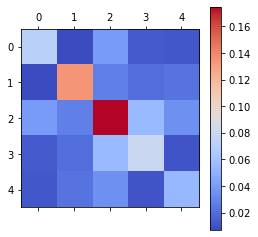

In [7]:
e = nx.attribute_mixing_matrix(G, 'region')

print('Assortativity matrix')
print(e)

plt.matshow(e, cmap='coolwarm')
cb = plt.colorbar()
plt.show()

In [8]:
# Create a Circos Plot
c = nv.CircosPlot(G,
                  node_color="region",
                  node_grouping="region",
                  node_order="region",
                  group_order="alphabetically",
                  group_legend=True,
                  node_labels=True,
                  group_label_position="middle",
                  group_label_color=False,
                  node_label_position='middle',
                  figsize=(100, 100))

c.draw()
plt.savefig("flights_network.png", 
            format="png",
            transparent=True)

plt.show()

C:\Users\jonatas\anaconda3\lib\site-packages\nxviz\api.py:275: UserWarning: As of nxviz 0.7, the object-oriented API is being deprecated in favour of a functional API. Please consider switching your plotting code! The object-oriented API wrappers remains in place to help you transition over. A few changes between the old and new API exist; please consult the nxviz documentation for more information. When the 1.0 release of nxviz happens, the object-oriented API will be dropped entirely.
  warnings.warn(


KeyError: 'group_order'

## 2) Analysis of the Air Traffic Network network degree conectivity
In this step, our objective is to make a bivariate analysis on the nodes' degrees and their avarage neighborhoods' degrees. 

In [9]:
nx.degree_assortativity_coefficient(G)

-0.19974209292576134

In [10]:
def graph_degree_avg_neigh_degree(input_Graph: nx.Graph):
    degree, avg_neigh_degree = zip(*nx.average_degree_connectivity(input_Graph).items())
    # convert to list
    degree = list(degree)
    avg_neigh_degree = list(avg_neigh_degree)
    return degree, avg_neigh_degree

In [11]:
list_nodes_norte = []
list_nodes_sul = []
list_nodes_sudeste = []
list_nodes_centro_oeste = []
list_nodes_nordeste = []

for node, atr in G.nodes(data=True):
    if atr['region'].lower() == 'norte':
        list_nodes_norte.append(node)
    elif atr['region'].lower() == 'sul':
        list_nodes_sul.append(node)
    elif atr['region'].lower() == 'sudeste':
        list_nodes_sudeste.append(node)
    elif atr['region'].lower() == 'centro-oeste':
        list_nodes_centro_oeste.append(node)
    elif atr['region'].lower() == 'nordeste':
        list_nodes_nordeste.append(node)

G_norte = G.subgraph(list_nodes_norte)
G_sul = G.subgraph(list_nodes_sul)
G_sudeste = G.subgraph(list_nodes_sudeste)
G_centro_oeste = G.subgraph(list_nodes_centro_oeste)
G_nordeste = G.subgraph(list_nodes_nordeste)

In [12]:
degree_brasil, avg_neigh_degree_brasil = graph_degree_avg_neigh_degree(G)

degree_norte, avg_neigh_degree_norte = graph_degree_avg_neigh_degree(G_norte)
degree_sul, avg_neigh_degree_sul = graph_degree_avg_neigh_degree(G_sul)
degree_sudeste, avg_neigh_degree_sudeste = graph_degree_avg_neigh_degree(G_sudeste)
degree_centro_oeste, avg_neigh_degree_centro_oeste = graph_degree_avg_neigh_degree(G_centro_oeste)
degree_nordeste, avg_neigh_degree_nordeste = graph_degree_avg_neigh_degree(G_nordeste)

C:\Users\jonatas\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


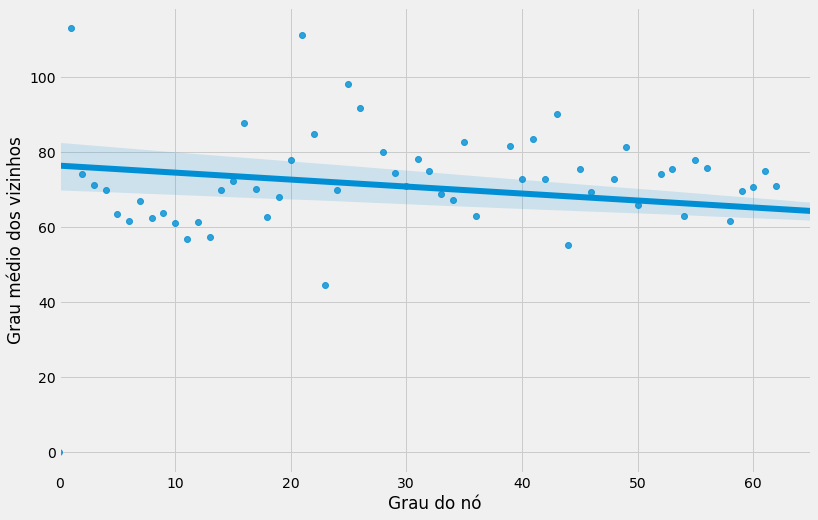

In [13]:
plt.style.use("fivethirtyeight")
fig, ax = plt.subplots(1, 1, figsize=(12, 8))

sns.regplot(degree_brasil, avg_neigh_degree_brasil, ax=ax)

ax.set_xlabel("Grau do nó")
ax.set_ylabel("Grau médio dos vizinhos")
ax.set_xlim(0,65)

# Save figure
plt.savefig("degree_assortativity_brasil.png", 
            format="png",
            dpi=400, 
            bbox_inches="tight",
            transparent=True)

plt.show()

C:\Users\jonatas\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\jonatas\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\jonatas\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\jonatas

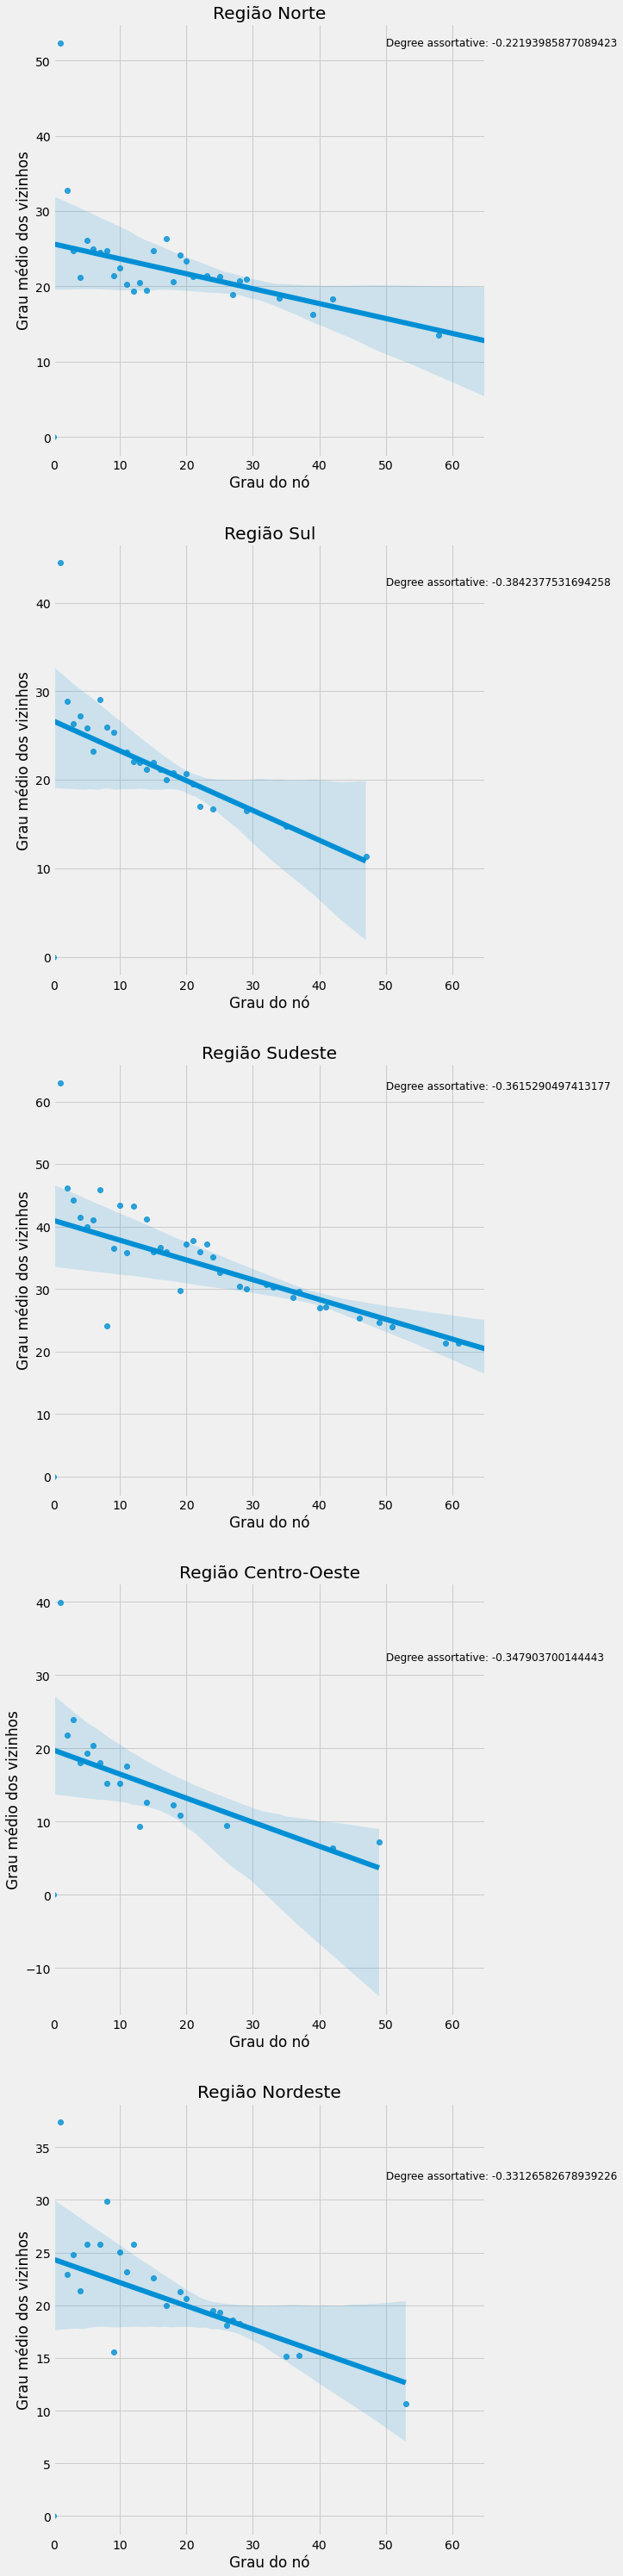

In [14]:
plt.style.use("fivethirtyeight")

fig = plt.figure(figsize=(8, 50))

ax_norte = fig.add_subplot(5, 1, 1)
ax_sul = fig.add_subplot(5, 1, 2)
ax_sudeste = fig.add_subplot(5, 1, 3)
ax_centro_oeste = fig.add_subplot(5, 1, 4)
ax_nordeste = fig.add_subplot(5, 1, 5)


sns.regplot(degree_norte, avg_neigh_degree_norte, ax=ax_norte)
sns.regplot(degree_sul, avg_neigh_degree_sul, ax=ax_sul)
sns.regplot(degree_sudeste, avg_neigh_degree_sudeste, ax=ax_sudeste)
sns.regplot(degree_centro_oeste, avg_neigh_degree_centro_oeste, ax=ax_centro_oeste)
sns.regplot(degree_nordeste, avg_neigh_degree_nordeste, ax=ax_nordeste)

ax_norte.set_xlabel("Grau do nó")
ax_norte.set_ylabel("Grau médio dos vizinhos")
ax_norte.set_xlim(0,65)

ax_sul.set_xlabel("Grau do nó")
ax_sul.set_ylabel("Grau médio dos vizinhos")
ax_sul.set_xlim(0,65)

ax_sudeste.set_xlabel("Grau do nó")
ax_sudeste.set_ylabel("Grau médio dos vizinhos")
ax_sudeste.set_xlim(0,65)

ax_centro_oeste.set_xlabel("Grau do nó")
ax_centro_oeste.set_ylabel("Grau médio dos vizinhos")
ax_centro_oeste.set_xlim(0,65)

ax_nordeste.set_xlabel("Grau do nó")
ax_nordeste.set_ylabel("Grau médio dos vizinhos")
ax_nordeste.set_xlim(0,65)

ax_norte.set_title("Região Norte")
ax_sul.set_title("Região Sul")
ax_sudeste.set_title("Região Sudeste")
ax_centro_oeste.set_title("Região Centro-Oeste")
ax_nordeste.set_title("Região Nordeste")

ax_norte.text(50, 52, f'Degree assortative: {nx.degree_assortativity_coefficient(G_norte)}', fontsize=12)
ax_sul.text(50, 42, f'Degree assortative: {nx.degree_assortativity_coefficient(G_sul)}', fontsize=12)
ax_sudeste.text(50, 62, f'Degree assortative: {nx.degree_assortativity_coefficient(G_sudeste)}', fontsize=12)
ax_centro_oeste.text(50, 32, f'Degree assortative: {nx.degree_assortativity_coefficient(G_centro_oeste)}', fontsize=12)
ax_nordeste.text(50, 32, f'Degree assortative: {nx.degree_assortativity_coefficient(G_nordeste)}', fontsize=12)

# # Save figure
# plt.savefig("degree_assortativity_brasil.png", 
#             format="png",
#             dpi=400, 
#             bbox_inches="tight",
#             transparent=True)

plt.show()

### 3) Analysis network components conectivity

In [15]:
nx.number_connected_components(G)

5

In [16]:
porcentagem_norte = 0
porcentagem_sul = 0
porcentagem_sudeste = 0
porcentagem_centro_oeste = 0
porcentagem_nordeste = 0

for component in nx.connected_components(G):
    print(f'Quantidade de vôos: {len(component)}')
    for node in component:
        if node in list_nodes_norte:
            porcentagem_norte += 1
        elif node in list_nodes_sul:
            porcentagem_sul += 1
        elif node in list_nodes_sudeste:
            porcentagem_sudeste += 1
        elif node in list_nodes_centro_oeste:
            porcentagem_centro_oeste += 1
        elif node in list_nodes_nordeste:
            porcentagem_nordeste += 1
    print(f'Porcentagem Norte: {(porcentagem_norte/len(component))*100:.2f}%')
    print(f'Porcentagem Sul: {(porcentagem_sul/len(component))*100:.2f}%')
    print(f'Porcentagem Sudeste: {(porcentagem_sudeste/len(component))*100:.2f}%')
    print(f'Porcentagem Centro-Oeste: {(porcentagem_centro_oeste/len(component))*100:.2f}%')
    print(f'Porcentagem Nordeste: {(porcentagem_nordeste/len(component))*100:.2f}%')
    print('\n')
    porcentagem_norte = 0
    porcentagem_sul = 0
    porcentagem_sudeste = 0
    porcentagem_centro_oeste = 0
    porcentagem_nordeste = 0
    

Quantidade de vôos: 497
Porcentagem Norte: 25.35%
Porcentagem Sul: 14.69%
Porcentagem Sudeste: 23.54%
Porcentagem Centro-Oeste: 18.11%
Porcentagem Nordeste: 18.31%


Quantidade de vôos: 1
Porcentagem Norte: 0.00%
Porcentagem Sul: 0.00%
Porcentagem Sudeste: 100.00%
Porcentagem Centro-Oeste: 0.00%
Porcentagem Nordeste: 0.00%


Quantidade de vôos: 1
Porcentagem Norte: 0.00%
Porcentagem Sul: 0.00%
Porcentagem Sudeste: 0.00%
Porcentagem Centro-Oeste: 100.00%
Porcentagem Nordeste: 0.00%


Quantidade de vôos: 1
Porcentagem Norte: 100.00%
Porcentagem Sul: 0.00%
Porcentagem Sudeste: 0.00%
Porcentagem Centro-Oeste: 0.00%
Porcentagem Nordeste: 0.00%


Quantidade de vôos: 1
Porcentagem Norte: 100.00%
Porcentagem Sul: 0.00%
Porcentagem Sudeste: 0.00%
Porcentagem Centro-Oeste: 0.00%
Porcentagem Nordeste: 0.00%




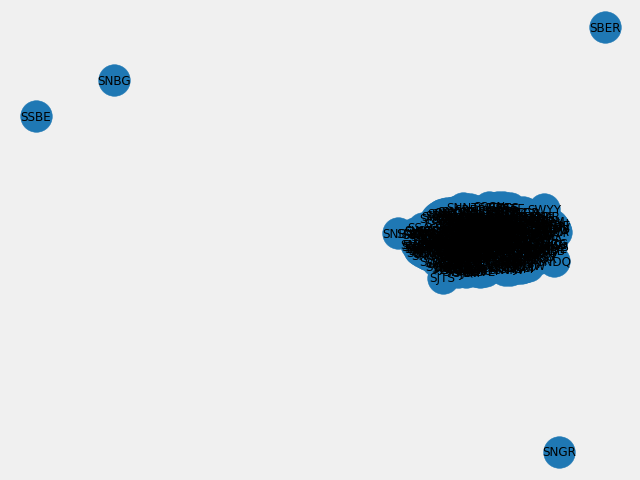

In [17]:
fig, ax = plt.subplots(1, 1,figsize=(10,8))
nx.draw_networkx(G, ax=ax,node_size=1000)
plt.axis("off")
plt.show()

### 4) Paths between airports and their shortest path

In [33]:
from random import choice

# Selecionando as cidades aleatórias para a simulação de vôos
cidade_norte = choice(list_nodes_norte)
print(f'Cidade selecionada do Norte para simulação: {G.nodes[cidade_norte]["name"]}')
cidade_sul = choice(list_nodes_sul)
print(f'Cidade selecionada do Sul para simulação: {G.nodes[cidade_sul]["name"]}')
cidade_sudeste = choice(list_nodes_sudeste)
print(f'Cidade selecionada do Sudeste para simulação: {G.nodes[cidade_sudeste]["name"]}')
cidade_centro_oeste = choice(list_nodes_centro_oeste)
print(f'Cidade selecionada do Centro-Oeste para simulação: {G.nodes[cidade_centro_oeste]["name"]}')
cidade_nordeste = choice(list_nodes_nordeste)
print(f'Cidade selecionada do Nordeste para simulação: {G.nodes[cidade_nordeste]["name"]}')
print('\n')
print('Trajeto de vôos do Norte para o Sul')
# Descreve o grafo com os trajetos entre as cidades do norte e sul
for cidade in nx.shortest_path(G, cidade_norte, cidade_sul):
    if cidade == cidade_sul:
        print(G.nodes[cidade]['name'])
    else:
        print(G.nodes[cidade]['name'], end=' -> ')
print(f'Distância total: {nx.shortest_path_length(G, cidade_norte, cidade_sul)}')
print('\n')
print('Trajeto de vôos do Sul para o Nordeste')
# Descreve o grafo com os trajetos entre as cidades do sul e nordeeste
for cidade in nx.shortest_path(G, cidade_sul, cidade_nordeste):
    if cidade == cidade_nordeste:
        print(G.nodes[cidade]['name'])
    else:
        print(G.nodes[cidade]['name'], end=' -> ')
print(f'Distância total: {nx.shortest_path_length(G, cidade_sul, cidade_nordeste)}')
print('\n')
# Descreve o grafo com os trajetos entre as cidades do nordeste e centro-oeste
print('Trajeto de vôos do Nordeste para o Centro-Oeste')
for cidade in nx.shortest_path(G, cidade_nordeste, cidade_centro_oeste):
    if cidade == cidade_centro_oeste:
        print(G.nodes[cidade]['name'])
    else:
        print(G.nodes[cidade]['name'], end=' -> ')
print(f'Distância total: {nx.shortest_path_length(G, cidade_nordeste, cidade_centro_oeste)}')
print('\n')
# Descreve o grafo com os trajetos entre as cidades do centro-oeste e sudeste
print('Trajeto de vôos do Centro-Oeste para o Sudeste')
for cidade in nx.shortest_path(G, cidade_centro_oeste, cidade_sudeste):
    if cidade == cidade_sudeste:
        print(G.nodes[cidade]['name'])
    else:
        print(G.nodes[cidade]['name'], end=' -> ')
print(f'Distância total: {nx.shortest_path_length(G, cidade_centro_oeste, cidade_sudeste)}')
print('\n')
# Descreve o grafo com os trajetos entre as cidades do norte para o sudeste
print('Trajeto de vôos do Norte para o Sudeste, "trajeto total"')
for cidade in nx.shortest_path(G, cidade_norte, cidade_sudeste):
    if cidade == cidade_sudeste:
        print(G.nodes[cidade]['name'])
    else:
        print(G.nodes[cidade]['name'], end=' -> ')
print(f'Distância total: {nx.shortest_path_length(G, cidade_norte, cidade_sudeste)}')

Cidade selecionada do Norte para simulação: ATALAIA DO NORTE
Cidade selecionada do Sul para simulação: SÃO JOSÉ DOS PINHAIS
Cidade selecionada do Sudeste para simulação: GOVERNADOR VALADARES
Cidade selecionada do Centro-Oeste para simulação: BARRA DO GARÇAS
Cidade selecionada do Nordeste para simulação: CARUARU


Trajeto de vôos do Norte para o Sul
ATALAIA DO NORTE -> MANAUS -> SÃO JOSÉ DOS PINHAIS
Distância total: 2


Trajeto de vôos do Sul para o Nordeste
SÃO JOSÉ DOS PINHAIS -> PETROLINA -> CARUARU
Distância total: 2


Trajeto de vôos do Nordeste para o Centro-Oeste
CARUARU -> PETROLINA -> GOIÂNIA -> BARRA DO GARÇAS
Distância total: 3


Trajeto de vôos do Centro-Oeste para o Sudeste
BARRA DO GARÇAS -> GOIÂNIA -> JUIZ DE FORA -> GOVERNADOR VALADARES
Distância total: 3


Trajeto de vôos do Norte para o Sudeste, "trajeto total"
ATALAIA DO NORTE -> TABATINGA -> BRASÍLIA -> GOVERNADOR VALADARES
Distância total: 3


### 5) Analysis of the network's Clustering Coefficient

In [38]:
for cidade_coeficiente in nx.clustering(G):
    print(f'Coeficiente de agrupamento de {G.nodes[cidade_coeficiente]["name"]}: {nx.clustering(G)[cidade_coeficiente]}')
print('\n')
print('Coeficiente de agrupamento médio:', nx.average_clustering(G))


Coeficiente de agrupamento de SERRA TALHADA: 0
Coeficiente de agrupamento de TEFÉ: 0.35079365079365077
Coeficiente de agrupamento de BAIXO GUANDU: 0
Coeficiente de agrupamento de SÃO GABRIEL DA CACHOEIRA: 0.4
Coeficiente de agrupamento de GUARANTÃ DO NORTE: 0.8095238095238095
Coeficiente de agrupamento de FRANCA: 0.7118279569892473
Coeficiente de agrupamento de ARUANÃ: 1.0
Coeficiente de agrupamento de DIAMANTINA: 0.7
Coeficiente de agrupamento de BARRETOS: 0.8917748917748918
Coeficiente de agrupamento de JUAZEIRO DO NORTE: 0.6257309941520468
Coeficiente de agrupamento de URUGUAIANA: 0.6023391812865497
Coeficiente de agrupamento de PETRÓPOLIS: 0
Coeficiente de agrupamento de CARAUARI: 0.5604395604395604
Coeficiente de agrupamento de VIDEIRA: 0.9818181818181818
Coeficiente de agrupamento de BORBA: 0.6
Coeficiente de agrupamento de CAIRUI: 0.6666666666666666
Coeficiente de agrupamento de SORRISO: 0.5714285714285714
Coeficiente de agrupamento de CACOAL: 0.803030303030303
Coeficiente de ag

In [40]:
for cidade_coeficiente in nx.clustering(G_norte):
    print(f'Coeficiente de agrupamento de {G_norte.nodes[cidade_coeficiente]["name"]}: {nx.clustering(G_norte)[cidade_coeficiente]}')
print('\n')
print('Coeficiente de agrupamento médio:', nx.average_clustering(G_norte))

Coeficiente de agrupamento de CHAVES: 0
Coeficiente de agrupamento de ORIXIMINÁ: 0.6617647058823529
Coeficiente de agrupamento de PARAUAPEBAS: 1.0
Coeficiente de agrupamento de ITACOATIARA: 0.4642857142857143
Coeficiente de agrupamento de FONTE BOA: 0.6212121212121212
Coeficiente de agrupamento de COARI: 0.7857142857142857
Coeficiente de agrupamento de COSTA MARQUES: 1.0
Coeficiente de agrupamento de CARAUARI: 0.5769230769230769
Coeficiente de agrupamento de ATALAIA DO NORTE: 1.0
Coeficiente de agrupamento de CUMARU DO NORTE: 0
Coeficiente de agrupamento de PARAGOMINAS: 0.6666666666666666
Coeficiente de agrupamento de BARCELOS: 1.0
Coeficiente de agrupamento de OURILÂNDIA DO NORTE: 0.8666666666666667
Coeficiente de agrupamento de VILHENA: 0.6190476190476191
Coeficiente de agrupamento de PALMAS: 0
Coeficiente de agrupamento de TAILÂNDIA: 1.0
Coeficiente de agrupamento de PARINTINS: 0.5263157894736842
Coeficiente de agrupamento de SÃO GABRIEL DA CACHOEIRA: 0.4
Coeficiente de agrupamento 

In [41]:
for cidade_coeficiente in nx.clustering(G_sul):
    print(f'Coeficiente de agrupamento de {G_sul.nodes[cidade_coeficiente]["name"]}: {nx.clustering(G_sul)[cidade_coeficiente]}')
print('\n')
print('Coeficiente de agrupamento médio:', nx.average_clustering(G_sul))

Coeficiente de agrupamento de PELOTAS: 0.6666666666666666
Coeficiente de agrupamento de IBAITI: 0
Coeficiente de agrupamento de GUARAPUAVA: 1.0
Coeficiente de agrupamento de ALEGRETE: 0.7
Coeficiente de agrupamento de JOAÇABA: 0.7142857142857143
Coeficiente de agrupamento de TOLEDO: 0.8571428571428571
Coeficiente de agrupamento de APUCARANA: 1.0
Coeficiente de agrupamento de MARINGÁ: 0.8333333333333334
Coeficiente de agrupamento de MARECHAL CÂNDIDO RONDON: 0
Coeficiente de agrupamento de RIO GRANDE: 0.8571428571428571
Coeficiente de agrupamento de SÃO SEPÉ: 1.0
Coeficiente de agrupamento de ERECHIM: 0.6405228758169934
Coeficiente de agrupamento de URUGUAIANA: 0.65
Coeficiente de agrupamento de CAÇADOR: 0.8
Coeficiente de agrupamento de FOZ DO IGUAÇU: 0.45021645021645024
Coeficiente de agrupamento de JAGUARUNA: 1.0
Coeficiente de agrupamento de SANTA ROSA: 0.6666666666666666
Coeficiente de agrupamento de CONCÓRDIA: 0.8363636363636363
Coeficiente de agrupamento de UMUARAMA: 0.66666666666

In [42]:
for cidade_coeficiente in nx.clustering(G_sudeste):
    print(f'Coeficiente de agrupamento de {G_sudeste.nodes[cidade_coeficiente]["name"]}: {nx.clustering(G_sudeste)[cidade_coeficiente]}')
print('\n')
print('Coeficiente de agrupamento médio:', nx.average_clustering(G_sudeste))

Coeficiente de agrupamento de PIRASSUNUNGA: 1.0
Coeficiente de agrupamento de LAGOA SANTA: 1.0
Coeficiente de agrupamento de ARAÇATUBA: 0.8300395256916996
Coeficiente de agrupamento de PARATY: 0.7272727272727273
Coeficiente de agrupamento de SOROCABA: 0.6229838709677419
Coeficiente de agrupamento de BEBEDOURO: 0
Coeficiente de agrupamento de ANGRA DOS REIS: 0.8444444444444444
Coeficiente de agrupamento de RESENDE: 0.8095238095238095
Coeficiente de agrupamento de VOTUPORANGA: 0.9555555555555556
Coeficiente de agrupamento de FORMIGA: 0
Coeficiente de agrupamento de GAVIÃO PEIXOTO: 1.0
Coeficiente de agrupamento de SÃO MATEUS: 1.0
Coeficiente de agrupamento de POUSO ALEGRE: 0.5
Coeficiente de agrupamento de SÃO JOSÉ DO RIO PRETO: 0.5126984126984127
Coeficiente de agrupamento de FRANCA: 0.7132352941176471
Coeficiente de agrupamento de PATROCÍNIO: 0.8
Coeficiente de agrupamento de UBERABA: 0.5380952380952381
Coeficiente de agrupamento de VITÓRIA: 0.45897435897435895
Coeficiente de agrupamen

In [43]:
for cidade_coeficiente in nx.clustering(G_nordeste):
    print(f'Coeficiente de agrupamento de {G_nordeste.nodes[cidade_coeficiente]["name"]}: {nx.clustering(G_nordeste)[cidade_coeficiente]}')
print('\n')
print('Coeficiente de agrupamento médio:', nx.average_clustering(G_nordeste))

Coeficiente de agrupamento de TAUÁ: 0
Coeficiente de agrupamento de RECIFE: 0.33483483483483484
Coeficiente de agrupamento de CAMPINA GRANDE: 0.6491228070175439
Coeficiente de agrupamento de SOBRAL: 0
Coeficiente de agrupamento de PORTO SEGURO: 0
Coeficiente de agrupamento de VITÓRIA DA CONQUISTA: 0.4338235294117647
Coeficiente de agrupamento de BREJO: 0
Coeficiente de agrupamento de PORTO SEGURO: 0
Coeficiente de agrupamento de SÃO LUÍS: 0.5947368421052631
Coeficiente de agrupamento de BACABAL: 0
Coeficiente de agrupamento de RUSSAS: 0
Coeficiente de agrupamento de SÃO GONÇALO DO AMARANTE: 0.7720588235294118
Coeficiente de agrupamento de CRUZ: 1.0
Coeficiente de agrupamento de RIO LARGO: 0
Coeficiente de agrupamento de JEQUIÉ: 0
Coeficiente de agrupamento de SÃO DESIDÉRIO: 0
Coeficiente de agrupamento de JOÃO PESSOA: 1.0
Coeficiente de agrupamento de CAROLINA: 0
Coeficiente de agrupamento de VITÓRIA DA CONQUISTA: 0.9285714285714286
Coeficiente de agrupamento de JUAZEIRO DO NORTE: 0.56

In [ ]:
for cidade_coeficiente in nx.clustering(G_centro_oeste):
    print(f'Coeficiente de agrupamento de {G_centro_oeste.nodes[cidade_coeficiente]["name"]}: {nx.clustering(G_centro_oeste)[cidade_coeficiente]}')
print('\n')
print('Coeficiente de agrupamento médio:', nx.average_clustering(G_centro_oeste))